In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv('country-data.csv')

In [5]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [6]:
def minmax(x):
    xs = (x - x.min())/(x.max() - x.min()) 
    return xs

In [7]:
df_new=minmax(df.iloc[:,1:])

In [8]:
df_new.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242


In [9]:
from sklearn.cluster import KMeans

In [10]:
sse=[]
k_range=range(1,30)
for k in k_range:
    cls=KMeans(n_clusters=k)
    cls.fit(df_new)
    sse.append(cls.inertia_)

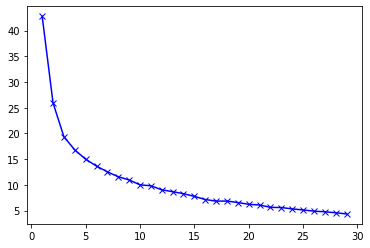

In [11]:
plt.plot(k_range,sse,'bx-')
plt.show()

In [12]:
cls=KMeans(n_clusters=4,n_init=10,max_iter=300,random_state=1)

In [13]:
labels=cls.fit_predict(df_new)

In [14]:
df["labels"]=pd.Series(labels)

In [15]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


In [16]:
df[["country","labels"]].head()

,country,labels
0,Afghanistan,1
1,Albania,2
2,Algeria,2
3,Angola,1
4,Antigua and Barbuda,2


In [17]:
df0=df[df.labels==0]
df1=df[df.labels==1]
df2=df[df.labels==2]
df3=df[df.labels==3]

In [18]:
df0.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,0
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,0
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,0
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,0
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,0


In [19]:
df1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,1
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,1
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,1
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,1
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,1


In [20]:
df2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2
5,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300,2
6,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,2


In [21]:
df3.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,3
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100,3
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,3


In [22]:
df.groupby("labels").mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
labels,,,,,,,,,
0,4.903226,46.477419,9.127097,40.483871,44703.225806,2.607613,80.283871,1.786129,42574.193548
1,93.284783,29.287174,6.338478,43.297826,3516.804348,12.097065,59.393478,5.090217,1695.913043
2,22.248276,40.795276,6.245172,47.286964,12913.678161,7.527138,72.616092,2.283333,6833.356322
3,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667


In [23]:
from sklearn.decomposition import PCA

In [24]:
pc=PCA(n_components=3,random_state=1)

In [25]:
df_pc=pc.fit_transform(df.drop(["country","labels"],axis=1))

In [26]:
pc1 = df_pc[:,0]
pc2 = df_pc[:,1]
pc3 = df_pc[:,2]

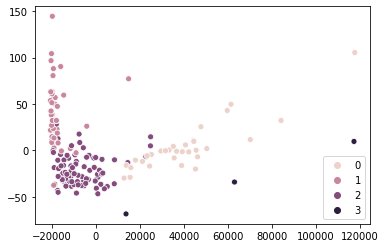

In [27]:
sns.scatterplot(pc1,pc3,hue=df["labels"].tolist())

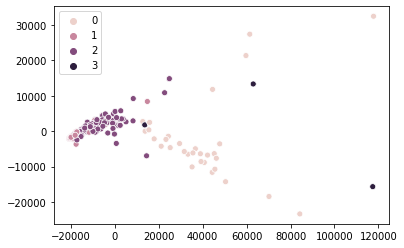

In [28]:
sns.scatterplot(pc1,pc2,hue=df["labels"].tolist())

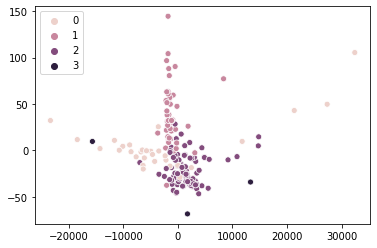

In [29]:
sns.scatterplot(pc2,pc3,hue=df["labels"].tolist())

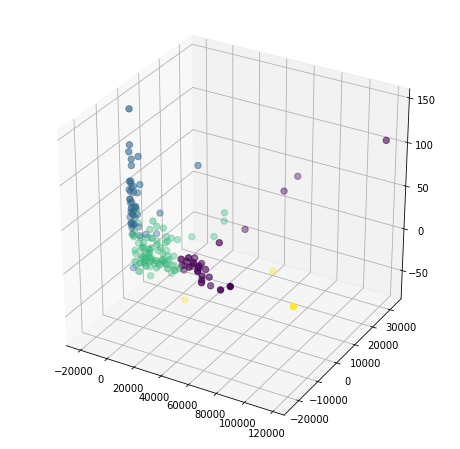

In [30]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
ax.scatter(pc1, pc2, pc3, s=40,c=df["labels"].tolist())